# ╔════════════╗
# ║ Օր 5 ‖ Իմ առաջին ԱԲ-ն.   ║
# ╚════════════╝
##### Այս բաժնում միասին կսովորենք՝ ինչպես կարելի է ստեղծել ամենապարզ ԱԲ-ն (արհեստական բանականությունը), ինչպես կարելի է այն բարդացնել, ու՝ թե ինչերի է այն ունակ։ Դե ի՞նչ։ Սկսեցի´նք

---------------

##### Աշխատացրու ստորև տարածքը, որպեսզի ունենաս քեզ պետքական գործիքները

In [19]:
from tqdm import tqdm

from random import choice as randomly_choose_from

import torch
import numpy as np

from PIL import Image

from torch import Tensor as Data
from torch.nn import ReLU as ActivationFunction
from torch.nn import Sequential as NeuralNetwork
from torch.nn import Linear as FullyConnectedLayer
from torch.nn import CrossEntropyLoss as LossFunction
from torch.nn import Softmax as ActivationLayerProbabilities

from torch.optim import SGD
from torch.utils.data import DataLoader
from torch.utils.data import random_split

from torchvision.datasets import MNIST as digits_dataset
from torchvision.transforms import ToTensor

from matplotlib.pyplot import plot as plot_graph
from matplotlib.pyplot import show as show_graph
from matplotlib.pyplot import imshow as show_image

from utils import utils

---------------
### Գիտե՞ս չինգաչունգ խաղը։ Իհարկե գիտես։ Ի՞նչ կարծիքի կլինես, եթե միասին ստեղծենք ԱԲ, որը քեզ հետ դա կխաղա :D

In [2]:
class RockScissorsPaperAI:
    def __init__(self):
        self.possible_choices = ["քար", "թուղթ", "մկրատ"] # հնարավոր ընտրություններ
        self.human_history = { # պատմություն մարդու ընտրությունների մասին
            "քար": 0,
            "թուղթ": 0,
            "մկրատ": 0
        }

    def play(self, player_choice):
        if player_choice not in self.possible_choices: # ստուգում, որ մարդու ընտրությունը ճիշտ է
            return "Դաղալություն մի արա, նորմալ բան ընտրի´ր։ Քար, թուղթ կամ մկրատ։"
        
        # Այն դեպքը, երբ մարդը դեռ ոչ մի անգամ չի ընտրել
        if self.human_history["քար"] == 0 and self.human_history["թուղթ"] == 0 and self.human_history["մկրատ"] == 0:
            computer_choice = randomly_choose_from(self.possible_choices)
        # Այն դեպքը, երբ մարդը արդեն մեկ կամ մի քանի անգամ ընտրել է
        else: 
            human_will_choose = max(self.human_history)
            if human_will_choose == "քար":
                computer_choice = "թուղթ"
            if human_will_choose == "թուղթ":
                computer_choice = "մկրատ"
            if human_will_choose == "մկրատ":
                computer_choice = "քար"

        # Ավելացնենք մարդու ընտրությունը պատմության մեջ
        self.human_history[player_choice] += 1 
        
        # Տեսնենք՝ ով հաղթեց
        if player_choice == computer_choice:
            return f"Վա´յ։ Ոչ ոքի :| ես էլ ընտրեցի {computer_choice}"
        if player_choice == "քար" and computer_choice == "թուղթ":
            return f"Պարտվեցի´ր :P ես ընտրեցի {computer_choice}"
        if player_choice == "թուղթ" and computer_choice == "մկրատ":
            return f"Պարտվեցի´ր :P ես ընտրեցի {computer_choice}"
        if player_choice == "մկրատ" and computer_choice == "քար":
            return f"Պարտվեցի´ր :P ես ընտրեցի {computer_choice}"
        else:
            return f"Լավ, այս անգամ դու հաղթեցիր :( ես ընտրեցի {computer_choice}"

#### Փորձե՞նք

In [ ]:
counter = 0 # Խաղերի հաշվիչ
ai = RockScissorsPaperAI() # Ստեղծում ենք ԱԲ-ն

# Խաղանք 8 անգամ
while counter < 8:
    # Մարդը ընտրում է
    player_choice = input("Քար, թուղթ կամ մկրատ։ Ի՞նչ ես ընտրում։ ")
    print(ai.play(player_choice)) # AI-ն պատասխանում է
    
    counter += 1 # Խաղերի հաշվիչը ավելացնում է 1

#### ՀՐԱԱԱԱՇՔ
#### Դու տեսար՝ ինչպես կարելի է ստեղծել ամենապարզ (թեկուզ և հիմարիկ) ԱԲ-ն։ Ապրե´ս։ Անցնե՞նք առաջ

---------------
### Չինգաչունգի «չեմպիոն» ունեցանք, բայց այն մի փոքր անկապի մեկն է։ Արի միասին ստեղծենք ավելի լավ ԱԲ, որը կկարողանա ճանաչել քո իսկ ձեռագրով գրված թվանշանները

Այս առաջադրանքի շրջանակներում դու պետք է ինքնուրույն կազմես քո նեյրոնային ցանցն ու փորձարկես այն՝ տեսնելով՝ ինչ արդյունքի կբերեն տարբեր կոնֆիգուրացիաներ։ Փորձիր տարբեր կոմբինացիաներ, տարբեր միջանկյալ շերտերի քանակներ. տես՝ ինչ կոմբինացիաների դեպքում ինչ արդյունք ես ստանում։ Օգտագործիր `FullyConnectedLayer` և `ActivationLayer` շերտերը, որպեսզի կարողանաս կառուցել քո նեյրոնային ցանցը.

Օգտագործման ֆորմատ՝
```
    FullyConnectedLayer(
                նեյրոնների քանակ տվյալ շերտում,
                նեյրոնների քանակ հաջորդ շերտում
            )

    ActivationLayer()
```

Օգտագործման օրինակ՝
```
    NeuralNetwork(
        FullyConnectedLayer(1, 3),
        ActivationLayer(),
        FullyConnectedLayer(3, 4),
        FullyConnectedLayer(4, 10),
        ActivationLayer()
        FullyConnectedLayer(10, 2),
        FullyConnectedLayer(2, 1),
    )
```

In [ ]:
class DigitRecognizer:
    def __init__(self):
        # Եթե հնարավոր է, օգտագործում ենք GPU, հակառակ դեպքում՝ CPU
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        
        # Մոդելի գլխավոր կառուցվածքը
        self.model = NeuralNetwork(
            FullyConnectedLayer(28 * 28, նեյրոնների քանակ), # 28x28 պիքսելանոց պատկերները հարթեցնում 
                                                            # ենք մեկ շերտի մեջ պահելու համար
            
            ActivationFunction(), # ակտիվացման ֆունկցիա

            FullyConnectedLayer(նեյրոնների քանակ, նեյրոնների քանակ), # երկրորդ շերտը՝ նեյրոնների քանակով
            ActivationFunction(), # ակտիվացման ֆունկցիա
            .
            .
            .
            FullyConnectedLayer(նեյրոնների քանակ, 10) # 10 դասերի համար, քանի որ մենք
                                                      # աշխատում ենք թվանշանների հետ (0-9)
        )

        self.loss_function = LossFunction() # սխալների հաշվիչ
        self.optimizer = SGD(self.model.parameters(), lr=0.01) # սովորելու օպտիմիզատոր
        self.dataset = digits_dataset(root="./digits_dataset", download=True, transform=ToTensor()) # սովորելու նյութ՝ թվանշանների հավաքածուն
        self.train_dataset, self.test_dataset = self._prepare_data() # բաժանում ենք տվյալները ուսուցման և թեստավորման համար

        self.batch_size = 64 # միավոր խմբի չափը՝ միաժամանակ ուսուցման համար

        self.train_accuracy_history = [] # պահելու ենք ուսուցման ճշգրտության պատմությունը
        self.test_accuracy_history = [] # պահելու ենք թեստավորման ճշգրտության պատմությունը

        self.model.to(self.device) # մոդելը տեղափոխում ենք GPU կամ CPU-ի վրա

    def _prepare_data(self):
        return utils.prepare_data(self.dataset)
    
    def train(self, epochs=50):
        training_results = utils.train_model(
            self.model,
            self.train_dataset,
            self.test_dataset,
            self.loss_function,
            self.optimizer,
            self.batch_size,
            epochs,
            self.device
        )
        # Ստանում ենք ուսուցման և թեստավորման ճշգրտության պատմությունը
        self.train_accuracy_history, self.test_accuracy_history = training_results

    def test(self):
        test_accuracy = utils.test(
            self.model,
            self.test_dataset,
            self.batch_size,
            self.device
        )

        print(f"Թեստավորման ճշգրտությունը՝ {test_accuracy:.2f}%")

    def predict(self, image):
        predicted = utils.predict(
            self.model,
            image,
            self.device
        )
        return predicted  # վերադարձնում ենք կանխատեսված թվանշանը որպես Python-ի թիվ
    
    def visualize(self, image):
        return utils.visualize(image)
    
    def predict_custom_image(self, image_path):
        predicted, img = utils.predict_custom_image(image_path)
        
        print(f"Գուշակած թվանշան՝ {predicted}")
        show_image(img)


Շրջան 1/1 - Սովորելու Ճշտություն՝ 60.89% | Վավերացման Ճշտություն՝ 81.91%
Թեստավորման ճշգրտությունը՝ 81.91%


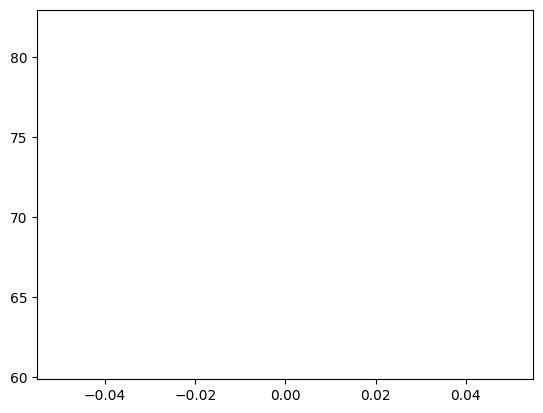

In [21]:
recognizer = DigitRecognizer() # թվանշանների ճանաչող մոդել՝ բուն ԱԲ-ն
recognizer.train(epochs=1) # 5 շրջան սովորեցնենք մոդելը
recognizer.test() # Թեստավորենք մոդելը

# Ճշտության պատմության գրաֆիկ
plot_graph(recognizer.train_accuracy_history, label='Սովորելու ճշտություն', color='blue') # Գրաֆիկների պատկերում
plot_graph(recognizer.test_accuracy_history, label='Թեստի ճշտություն', color='orange') # Գրաֆիկների պատկերում
show_graph()

In [ ]:
# Ձեռքով փորձենք
test_image, _test_image_label = recognizer.dataset[51] # նկարների դարանից կամայական (թող լինի 51րդ) նկարը, կարող ես դնել քո ուզած թիվը
predicted_digit = recognizer.predict(test_image) # թող մոդելը գուշակի գրված թվանշանը
print(f"Գուշակած: {predicted_digit}") # մոդելի գուշակած թվանշանը

# Նկարենք իրական թվանշանը
_ = show_image(test_image.view(28, 28).numpy(), cmap='gray')

In [ ]:
recognizer.predict_custom_image('քո նկարի հասցեն այստեղ') # փոխիր այս տողը՝ քո նկարի հասցեն դնելու համար

-----------------
### Եվ այսպես՝ դու ինքնուրույն կարողացար ստեղծել ԱԲ, որը ճանաչում է քո ձեռագրով գրված թվանշանները։ Ապրե´ս
-----------------

## Սիրելի ԹՈՒՄՈցի, շնորհավորում եմ։
Դու հաջողությամբ կարողացար հաղթահարել այս դասընթացի ամենաբարդ առաջադրանքները։ Հաջորդ դասին արի´, էլ ավելի հետաքրքիր բաներ կանենք միասին